<a href="https://colab.research.google.com/github/Sshubam/TensorFlow-Code/blob/main/03_introduction_to_computer_vision_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the Data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-10 16:25:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 74.125.137.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   104MB/s    in 1.0s    

2021-08-10 16:25:52 (104 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



# Inspect the Data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Aug 10 16:25 .
drwxr-xr-x 1 root root 4096 Aug 10 16:25 ..
-rw-r--r-- 1 root root 6148 Aug 10 16:25 .DS_Store
drwxr-xr-x 4 root root 4096 Aug 10 16:25 test
drwxr-xr-x 4 root root 4096 Aug 10 16:25 train


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

['2331467.jpg']
Image shape: (306, 512, 3)


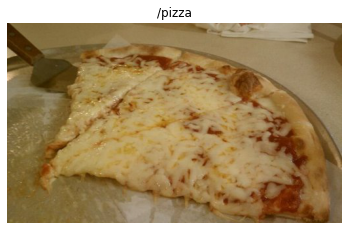

In [ ]:
img = view_random_image(target_dir="pizza_steak/train",
                        target_class ="/pizza")


In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 61,  25,   3],
        [ 63,  27,   5],
        [ 64,  28,   6],
        ...,
        [ 23,   8,   5],
        [ 24,   9,   6],
        [ 23,   8,   5]],

       [[ 61,  25,   3],
        [ 63,  27,   5],
        [ 64,  28,   6],
        ...,
        [ 19,   4,   1],
        [ 19,   4,   1],
        [ 18,   3,   0]],

       [[ 61,  25,   3],
        [ 63,  27,   5],
        [ 63,  27,   5],
        ...,
        [ 18,   3,   0],
        [ 17,   2,   0],
        [ 15,   0,   0]],

       ...,

       [[ 60,  33,   4],
        [ 59,  32,   2],
        [ 61,  34,   4],
        ...,
        [109,  81,  33],
        [101,  73,  25],
        [ 92,  64,  16]],

       [[ 63,  34,   4],
        [ 62,  33,   1],
        [ 64,  35,   1],
        ...,
        [110,  82,  34],
        [103,  75,  27],
        [ 94,  66,  18]],

       [[ 72,  43,  11],
        [ 70,  41,   7],
        [ 70,  42,   5],
        ...,
        [108,  80,  3

In [ ]:
img

array([[[ 61,  25,   3],
        [ 63,  27,   5],
        [ 64,  28,   6],
        ...,
        [ 23,   8,   5],
        [ 24,   9,   6],
        [ 23,   8,   5]],

       [[ 61,  25,   3],
        [ 63,  27,   5],
        [ 64,  28,   6],
        ...,
        [ 19,   4,   1],
        [ 19,   4,   1],
        [ 18,   3,   0]],

       [[ 61,  25,   3],
        [ 63,  27,   5],
        [ 63,  27,   5],
        ...,
        [ 18,   3,   0],
        [ 17,   2,   0],
        [ 15,   0,   0]],

       ...,

       [[ 60,  33,   4],
        [ 59,  32,   2],
        [ 61,  34,   4],
        ...,
        [109,  81,  33],
        [101,  73,  25],
        [ 92,  64,  16]],

       [[ 63,  34,   4],
        [ 62,  33,   1],
        [ 64,  35,   1],
        ...,
        [110,  82,  34],
        [103,  75,  27],
        [ 94,  66,  18]],

       [[ 72,  43,  11],
        [ 70,  41,   7],
        [ 70,  42,   5],
        ...,
        [108,  80,  32],
        [103,  75,  27],
        [ 95,  67,  17]]

In [ ]:
img.shape

(384, 512, 3)

In [ ]:
img/255.

array([[[0.23921569, 0.09803922, 0.01176471],
        [0.24705882, 0.10588235, 0.01960784],
        [0.25098039, 0.10980392, 0.02352941],
        ...,
        [0.09019608, 0.03137255, 0.01960784],
        [0.09411765, 0.03529412, 0.02352941],
        [0.09019608, 0.03137255, 0.01960784]],

       [[0.23921569, 0.09803922, 0.01176471],
        [0.24705882, 0.10588235, 0.01960784],
        [0.25098039, 0.10980392, 0.02352941],
        ...,
        [0.0745098 , 0.01568627, 0.00392157],
        [0.0745098 , 0.01568627, 0.00392157],
        [0.07058824, 0.01176471, 0.        ]],

       [[0.23921569, 0.09803922, 0.01176471],
        [0.24705882, 0.10588235, 0.01960784],
        [0.24705882, 0.10588235, 0.01960784],
        ...,
        [0.07058824, 0.01176471, 0.        ],
        [0.06666667, 0.00784314, 0.        ],
        [0.05882353, 0.        , 0.        ]],

       ...,

       [[0.23529412, 0.12941176, 0.01568627],
        [0.23137255, 0.1254902 , 0.00784314],
        [0.23921569, 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 210ms/step - loss: 0.5600 - accuracy: 0.7100 - val_loss: 0.3909 - val_accuracy: 0.8460
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4074 - accuracy: 0.8180 - val_loss: 0.3303 - val_accuracy: 0.8780
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.3857 - accuracy: 0.8253 - val_loss: 0.3125 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3461 - accuracy: 0.8547 - val_loss: 0.3104 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3081 - accuracy: 0.8753 - val_loss: 0.3053 - val_accuracy: 0.8740


In [ ]:
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

##Using the same model as before

In [ ]:
train_data

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 0.7718 - accuracy: 0.4927 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_steps=valid_data)

Epoch 1/5
47/47 [==============================] - 7s 139ms/step - loss: 3.2940 - accuracy: 0.6287
Epoch 2/5
47/47 [==============================] - 6s 134ms/step - loss: 0.7105 - accuracy: 0.7013
Epoch 3/5
47/47 [==============================] - 6s 136ms/step - loss: 0.5959 - accuracy: 0.7487
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.6268 - accuracy: 0.7287
Epoch 5/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4965 - accuracy: 0.7873


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

# Breaking down our CNN model

Getting one with the Data

['2893832.jpg']
Image shape: (512, 512, 3)
['1035854.jpg']
Image shape: (512, 512, 3)


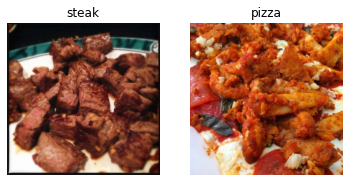

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img  = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

Preprocessing the data

In [ ]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
!nvidia-smi

Tue Aug 10 16:28:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    30W /  70W |   2270MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)   
test_datagen = ImageDataGenerator(rescale=1/255.)                             

In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
  images, labels = train_data.next()
  len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

47

In [ ]:
images[:2], images[0].shape

(array([[[[0.16470589, 0.16078432, 0.14509805],
          [0.16470589, 0.16078432, 0.14509805],
          [0.16470589, 0.14901961, 0.13725491],
          ...,
          [0.08627451, 0.07843138, 0.09803922],
          [0.09803922, 0.09019608, 0.10980393],
          [0.09411766, 0.08627451, 0.10588236]],
 
         [[0.18039216, 0.15294118, 0.12941177],
          [0.18823531, 0.16078432, 0.13725491],
          [0.1764706 , 0.14509805, 0.13333334],
          ...,
          [0.07450981, 0.06666667, 0.08627451],
          [0.08627451, 0.07843138, 0.09803922],
          [0.08235294, 0.07450981, 0.09411766]],
 
         [[0.16470589, 0.12941177, 0.10980393],
          [0.19215688, 0.15686275, 0.13725491],
          [0.17254902, 0.13725491, 0.11764707],
          ...,
          [0.08235294, 0.07450981, 0.09411766],
          [0.09019608, 0.08235294, 0.10196079],
          [0.09411766, 0.08627451, 0.10588236]],
 
         ...,
 
         [[0.12941177, 0.1137255 , 0.10980393],
          [0.11764

In [ ]:
labels

array([0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.],
      dtype=float32)

# Create a CNN Model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
 Conv2D(
     filters=10, #filter is the number of sliding windows going across an input(higher=more complex model)
     kernel_size=(3,3), #the size of the sliding window going across an input
     strides=(1, 1), #the size of the step the sliding window takes across an input
     padding="valid", #if same output shape is same as input shape and if valid output shape gets compressed, changed if the image has features near its edges
     activation="relu",
     input_shape=(224, 224, 3)), #input layers (specify input shape)
 Conv2D(10, 3, activation="relu"),
 Conv2D(10, 3, activation="relu"),
 Flatten(),
 Dense(1, activation="sigmoid")  #output layer (working with binary classification so only one output neuron)          
])  

In [ ]:
#Compile  the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## Fit the Model

In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data, #this is a combination of labels and smaple data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 204ms/step - loss: 1.4036 - accuracy: 0.6453 - val_loss: 0.4404 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4422 - accuracy: 0.8140 - val_loss: 0.4042 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 10s 208ms/step - loss: 0.3274 - accuracy: 0.8693 - val_loss: 0.3879 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.1767 - accuracy: 0.9413 - val_loss: 0.3902 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.0614 - accuracy: 0.9880 - val_loss: 0.5109 - val_accuracy: 0.8060


## Evaluating our Model

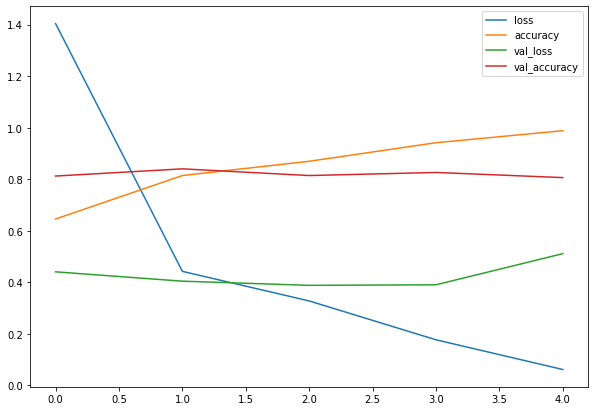

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

When a model's validation loss starts to increase its likely that the model is overfitting the training dataset. This means it is learning the patterns in training dataset too well, that means the model's ability to generalize unseen data will be diminished.

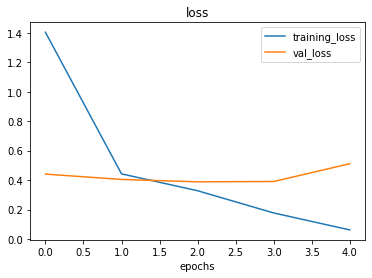

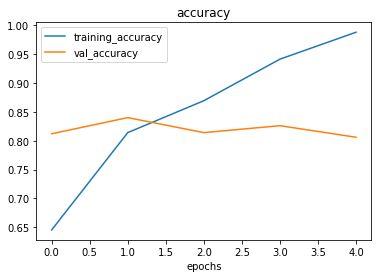

In [ ]:
plot_loss_curves(history_4)

In [ ]:
#Creating a new baseline model

model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data) 
)

Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 0.6521 - accuracy: 0.6200 - val_loss: 0.5323 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4935 - accuracy: 0.7640 - val_loss: 0.4224 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4156 - accuracy: 0.8167 - val_loss: 0.3617 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4162 - accuracy: 0.8153 - val_loss: 0.3690 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3778 - accuracy: 0.8320 - val_loss: 0.3484 - val_accuracy: 0.8320


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


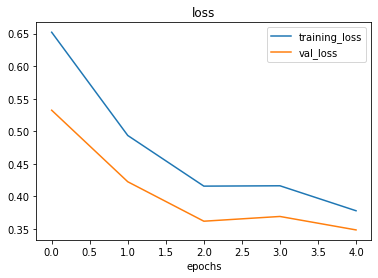

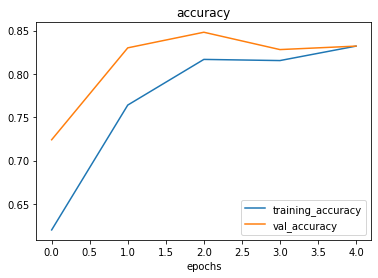

In [ ]:
#Plotting loss curves
plot_loss_curves(history_5)

# Finding Data augmentation

In [ ]:
#Create ImageDataGenerator trainign instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              horizontal_flip=True)

#Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**What is Data augmentation?**

Data augmentation is the process of altering our training data leading it to have more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [ ]:
#Import data and augment it from training directory
print("Augmented Training Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

#Create non-augmented train data batches 
print("Non-Augmented training Data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)

#Create non-augmented test data batches
print("Non-Augmented test Data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")


Augmented Training Data
Found 1500 images belonging to 2 classes.
Non-Augmented training Data
Found 1500 images belonging to 2 classes.
Non-Augmented test Data
Found 500 images belonging to 2 classes.


**Data** **augmentation** is usually performed only on the training Data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model and hence original images are still present in the directory. 

# Visualising augmented Data



In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()  #Only images are aughmented not labels

showing image number: 5


(-0.5, 223.5, 223.5, -0.5)

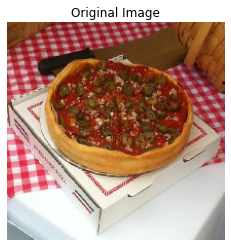

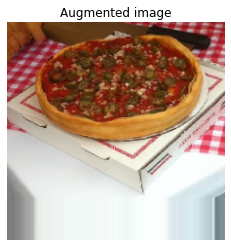

In [ ]:
#Show original image and augmented image
import random
random_number = random.randint(0, 31)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)

In [ ]:
model_6 = Sequential([
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 506ms/step - loss: 0.7160 - accuracy: 0.4447 - val_loss: 0.6876 - val_accuracy: 0.5220
Epoch 2/5
47/47 [==============================] - 23s 485ms/step - loss: 0.6946 - accuracy: 0.4953 - val_loss: 0.6606 - val_accuracy: 0.6400
Epoch 3/5
47/47 [==============================] - 22s 476ms/step - loss: 0.6941 - accuracy: 0.4640 - val_loss: 0.6580 - val_accuracy: 0.6260
Epoch 4/5
47/47 [==============================] - 24s 504ms/step - loss: 0.6673 - accuracy: 0.6367 - val_loss: 0.6142 - val_accuracy: 0.7400
Epoch 5/5
47/47 [==============================] - 23s 490ms/step - loss: 0.6310 - accuracy: 0.6720 - val_loss: 0.4915 - val_accuracy: 0.8080


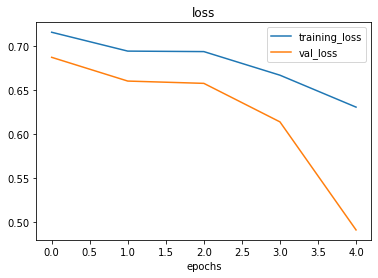

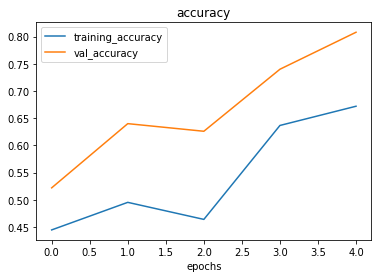

In [ ]:
#Check our model's training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                         target_size=(224, 224),
                                                                         class_mode="binary",
                                                                         shuffle=True,
                                                                         batch_size=32)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
   Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3))  ,
   MaxPool2D(),
   Conv2D(10, 3, activation="relu"),
   MaxPool2D(),
   Conv2D(10, 3, activation="relu"),
   Flatten(),
   Dense(1, activation="sigmoid")              
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 491ms/step - loss: 0.6042 - accuracy: 0.6733 - val_loss: 0.4624 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 24s 508ms/step - loss: 0.5106 - accuracy: 0.7380 - val_loss: 0.3757 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 23s 484ms/step - loss: 0.4994 - accuracy: 0.7687 - val_loss: 0.3693 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 23s 487ms/step - loss: 0.4779 - accuracy: 0.7760 - val_loss: 0.3450 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 24s 508ms/step - loss: 0.4518 - accuracy: 0.7927 - val_loss: 0.4247 - val_accuracy: 0.7860


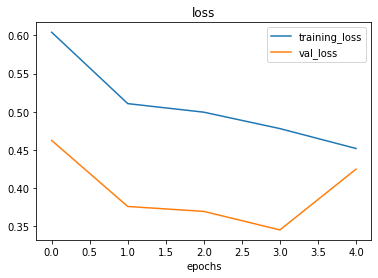

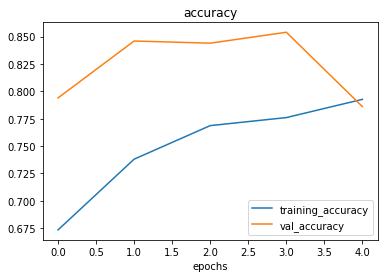

In [ ]:
plot_loss_curves(history_7)

In [ ]:
model_8 = Sequential([
   Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3))  ,
   MaxPool2D(),
   Conv2D(10, 3, activation="relu"),
   MaxPool2D(),
   Conv2D(10, 3, activation="relu"),
   MaxPool2D(),
   Conv2D(10, 3, activation="relu"),
   MaxPool2D(),
   Conv2D(10, 3, activation="relu"),
   MaxPool2D(),
   Flatten(),
   Dense(1, activation="sigmoid")              
])

model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=8,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/8
47/47 [==============================] - 24s 489ms/step - loss: 0.6831 - accuracy: 0.5707 - val_loss: 0.6349 - val_accuracy: 0.7920
Epoch 2/8
47/47 [==============================] - 24s 511ms/step - loss: 0.6113 - accuracy: 0.6840 - val_loss: 0.4953 - val_accuracy: 0.8120
Epoch 3/8
47/47 [==============================] - 23s 486ms/step - loss: 0.5427 - accuracy: 0.7380 - val_loss: 0.4358 - val_accuracy: 0.8240
Epoch 4/8
47/47 [==============================] - 23s 489ms/step - loss: 0.5455 - accuracy: 0.7347 - val_loss: 0.4224 - val_accuracy: 0.8380
Epoch 5/8
47/47 [==============================] - 23s 499ms/step - loss: 0.5088 - accuracy: 0.7553 - val_loss: 0.4390 - val_accuracy: 0.8140
Epoch 6/8
47/47 [==============================] - 24s 505ms/step - loss: 0.4990 - accuracy: 0.7727 - val_loss: 0.4055 - val_accuracy: 0.8340
Epoch 7/8
47/47 [==============================] - 23s 486ms/step - loss: 0.4688 - accuracy: 0.7860 - val_loss: 0.3595 - val_accuracy: 0.8600
Epoch 

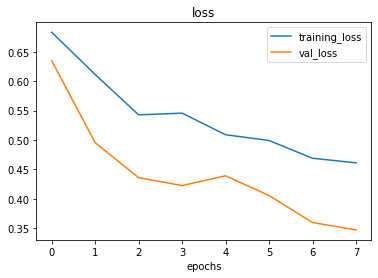

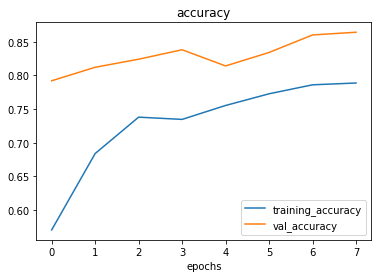

In [ ]:
plot_loss_curves(history_8)

In [ ]:
print(class_names)

['pizza' 'steak']


--2021-08-10 16:37:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2021-08-10 16:37:42 (52.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



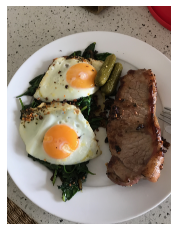

In [ ]:
#View our sample image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
#Create a function to import and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels)
  """
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, [img_shape, img_shape])
  img = img/255.
  return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
steak.shape

TensorShape([224, 224, 3])

In [ ]:
expanded_steak=tf.expand_dims(steak, axis=0)

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.9616692]], dtype=float32)

In [ ]:
class_names                 # 0 represents pizza and 1 represents steak ofc

array(['pizza', 'steak'], dtype='<U9')

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)
  pred=model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

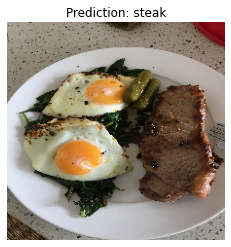

In [ ]:
pred_and_plot(model_7, "03-steak.jpeg")

--2021-08-10 16:38:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2021-08-10 16:38:42 (61.2 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



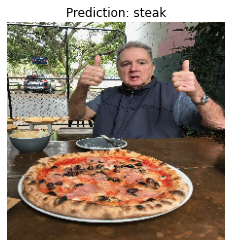

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

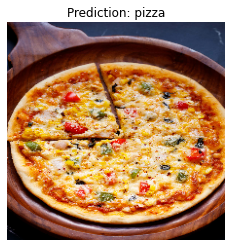

In [ ]:
pred_and_plot(model_7, "/content/pizza-recipe.jpg")

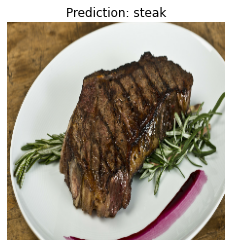

In [ ]:
pred_and_plot(model_7, "/content/sasur.jpg")

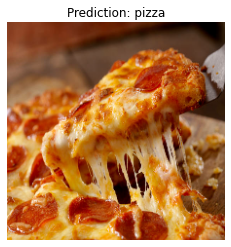

In [ ]:
pred_and_plot(model_8, "/content/sasur2.jpg")

# Multi-class Image Classification

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-08-12 06:34:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   109MB/s    in 4.7s    

2021-08-12 06:34:55 (105 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/test'
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
There are 10 directori

In [ ]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Aug 12 06:34 .
drwxr-xr-x  1 root root 4096 Aug 12 06:34 ..
drwxr-xr-x 12 root root 4096 Aug 12 06:34 test
drwxr-xr-x 12 root root 4096 Aug 12 06:34 train


In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1313316.jpg']
Image shape: (384, 512, 3)


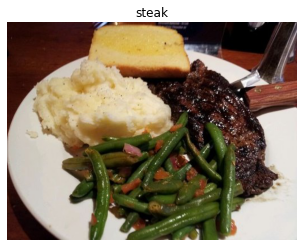

In [ ]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [ ]:
random.choice(class_names)

'chicken_wings'

# Preprocess the Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# Creating a Multi-class CNN Model

In [ ]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

model_8 = Sequential([
  Conv2D(10, 3, input_shape=(224, 224, 3)),
  Activation(activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10 ,3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax") 
])

model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 85s 236ms/step - loss: 2.1658 - accuracy: 0.1945 - val_loss: 1.9530 - val_accuracy: 0.3040
Epoch 2/5
235/235 [==============================] - 54s 230ms/step - loss: 1.8955 - accuracy: 0.3401 - val_loss: 1.9074 - val_accuracy: 0.3340
Epoch 3/5
235/235 [==============================] - 55s 236ms/step - loss: 1.4736 - accuracy: 0.5100 - val_loss: 1.9283 - val_accuracy: 0.3496
Epoch 4/5
235/235 [==============================] - 55s 236ms/step - loss: 0.7909 - accuracy: 0.7467 - val_loss: 2.5554 - val_accuracy: 0.3028
Epoch 5/5
235/235 [==============================] - 55s 233ms/step - loss: 0.2557 - accuracy: 0.9273 - val_loss: 3.5546 - val_accuracy: 0.2896


In [ ]:
len(train_data)

235

# Evaluate the Model

In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 157ms/step - loss: 3.5546 - accuracy: 0.2896


[3.554633617401123, 0.2896000146865845]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

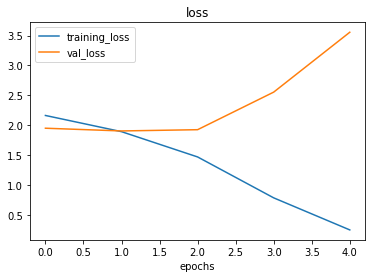

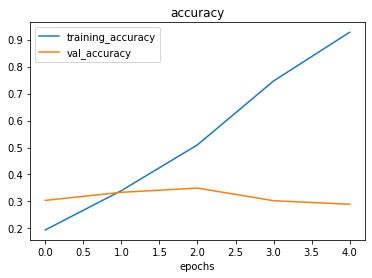

In [ ]:
     plot_loss_curves(history_8)

# Adjusting Model hyperparameters to reduce overfitting

In [ ]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0

In [ ]:
model_9 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

In [ ]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
235/235 [==============================] - 51s 214ms/step - loss: 2.1439 - accuracy: 0.2287 - val_loss: 1.9450 - val_accuracy: 0.3080
Epoch 2/5
235/235 [==============================] - 50s 212ms/step - loss: 1.7908 - accuracy: 0.3908 - val_loss: 1.8746 - val_accuracy: 0.3468
Epoch 3/5
235/235 [==============================] - 49s 209ms/step - loss: 1.4172 - accuracy: 0.5385 - val_loss: 1.9625 - val_accuracy: 0.3316
Epoch 4/5
235/235 [==============================] - 50s 211ms/step - loss: 0.9706 - accuracy: 0.7035 - val_loss: 2.1598 - val_accuracy: 0.3100
Epoch 5/5
235/235 [==============================] - 49s 208ms/step - loss: 0.5752 - accuracy: 0.8404 - val_loss: 2.5203 - val_accuracy: 0.2952


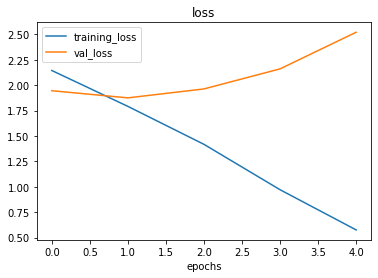

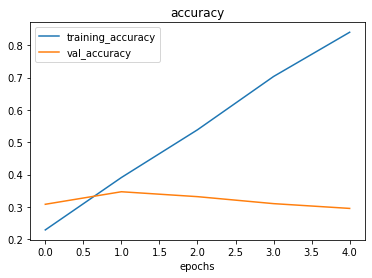

In [ ]:
plot_loss_curves(history_9)

# Reducing overfitting with data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
model_10 = tf.keras.models.clone_model(model_8)

model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [ ]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0

In [ ]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0

In [ ]:
history_10 = model_10.fit(train_data_augmented,
                         epochs=5,
                         steps_per_epoch=len(train_data_augmented),
                         validation_data=test_data,
                         validation_steps=len(test_data)) 

Epoch 1/5
235/235 [==============================] - 132s 561ms/step - loss: 2.1659 - accuracy: 0.2401 - val_loss: 1.8965 - val_accuracy: 0.3336
Epoch 2/5
235/235 [==============================] - 130s 553ms/step - loss: 1.9529 - accuracy: 0.3233 - val_loss: 1.7955 - val_accuracy: 0.3712
Epoch 3/5
235/235 [==============================] - 132s 560ms/step - loss: 1.9086 - accuracy: 0.3428 - val_loss: 1.7637 - val_accuracy: 0.3976
Epoch 4/5
235/235 [==============================] - 132s 560ms/step - loss: 1.8701 - accuracy: 0.3560 - val_loss: 1.7123 - val_accuracy: 0.3960
Epoch 5/5
235/235 [==============================] - 131s 557ms/step - loss: 1.8404 - accuracy: 0.3635 - val_loss: 1.7354 - val_accuracy: 0.3952


In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 13s 164ms/step - loss: 3.5546 - accuracy: 0.2896


[3.554633140563965, 0.2896000146865845]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 164ms/step - loss: 1.7354 - accuracy: 0.3952


[1.7353675365447998, 0.3952000141143799]

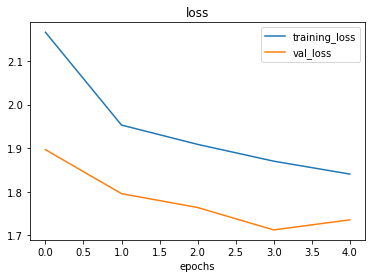

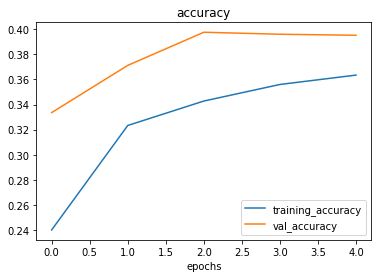

In [ ]:
plot_loss_curves(history_10)

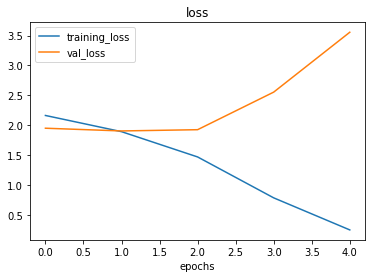

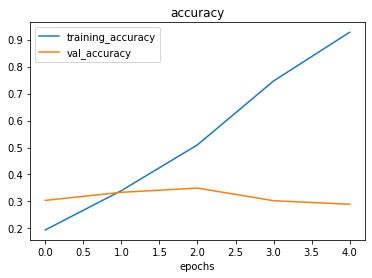

In [ ]:
plot_loss_curves(history_8)

# Making a prediction with our trained model

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2021-08-12 07:42:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2021-08-12 07:42:26 (35.1 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2021-08-12 07:42:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)
  pred=model.predict(tf.expand_dims(img, axis=0))
  if len(pred[0])>1:
    pred_class = class_names[int(tf.argmax(pred[0]))]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

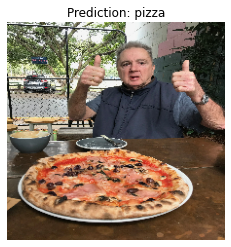

In [ ]:
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

[[0.06733737 0.10839904 0.02930753 0.14585683 0.09408755 0.04380445
  0.04608287 0.10271885 0.31847954 0.04392598]]


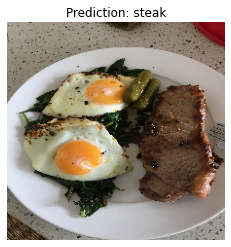

In [ ]:
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

[[0.20137843 0.16557027 0.0160011  0.13556202 0.06316205 0.00712957
  0.15321994 0.05892773 0.171239   0.02780984]]


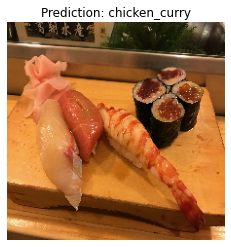

In [ ]:
pred_and_plot(model=model_10,
              filename="03-sushi.jpeg",
              class_names=class_names)

[[0.09765459 0.09149192 0.0171761  0.06027922 0.1916197  0.06582166
  0.06227477 0.16547196 0.12447123 0.12373885]]


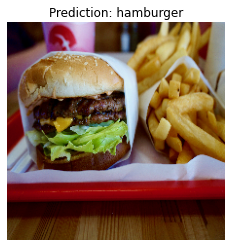

In [ ]:
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

# Saving and loading our model

In [ ]:
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [ ]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 13s 165ms/step - loss: 1.7354 - accuracy: 0.3952


[1.7353675365447998, 0.3952000141143799]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 163ms/step - loss: 1.7354 - accuracy: 0.3952


[1.7353675365447998, 0.3952000141143799]